##Importing Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries


In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Data Preprocessing

### Training Image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_and_vegetables_recognition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 3115 files belonging to 36 classes.


### Validation Image Preprocessing


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_and_vegetables_recognition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


### Building Model

In [93]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [94]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [95]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [96]:
cnn.add(tf.keras.layers.Flatten()) #Flattend our matrix into 2X2 matrix

In [97]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu')) #Building our neural network , we have 512 neurons

In [98]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [99]:
cnn.add(tf.keras.layers.Dropout(0.5)) #We are dropping some neuron to avoid overfitting

In [100]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax')) #We have 36 classes thats why uints=36

#Compiling and Training Phase

In [101]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [102]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                 

In [103]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 135s 1s/step - loss: 5.1713 - accuracy: 0.0424 - val_loss: 3.4347 - val_accuracy: 0.0655
Epoch 2/32
98/98 [==============================] - 123s 1s/step - loss: 3.4226 - accuracy: 0.0716 - val_loss: 3.0847 - val_accuracy: 0.0798
Epoch 3/32
98/98 [==============================] - 140s 1s/step - loss: 3.2435 - accuracy: 0.0998 - val_loss: 2.7791 - val_accuracy: 0.2906
Epoch 4/32
98/98 [==============================] - 125s 1s/step - loss: 2.9644 - accuracy: 0.1644 - val_loss: 2.2942 - val_accuracy: 0.4587
Epoch 5/32
98/98 [==============================] - 122s 1s/step - loss: 2.6346 - accuracy: 0.2536 - val_loss: 1.6979 - val_accuracy: 0.5470
Epoch 6/32
98/98 [==============================] - 122s 1s/step - loss: 2.1706 - accuracy: 0.3721 - val_loss: 1.1954 - val_accuracy: 0.7265
Epoch 7/32
98/98 [==============================] - 122s 1s/step - loss: 1.6106 - accuracy: 0.5262 - val_loss: 0.7208 - val_accuracy: 0.8348
Epoch 8/32
98

##Saving Model

In [104]:
cnn.save('trained_model.h5')

In [105]:
training_history.history

{'loss': [5.171298980712891,
  3.422614812850952,
  3.2434704303741455,
  2.9643869400024414,
  2.634605646133423,
  2.170553684234619,
  1.6106371879577637,
  1.1615582704544067,
  0.8131313323974609,
  0.5172154903411865,
  0.36886101961135864,
  0.289957195520401,
  0.29486262798309326,
  0.21393896639347076,
  0.20327787101268768,
  0.18168118596076965,
  0.17011047899723053,
  0.1581449806690216,
  0.15446630120277405,
  0.18059250712394714,
  0.1721166968345642,
  0.1485704928636551,
  0.14589086174964905,
  0.1528816968202591,
  0.15638001263141632,
  0.18802985548973083,
  0.17664167284965515,
  0.13255558907985687,
  0.10910369455814362,
  0.1540709286928177,
  0.10157414525747299,
  0.0883546993136406],
 'accuracy': [0.0423756018280983,
  0.07158908247947693,
  0.09983948618173599,
  0.1643659770488739,
  0.25361156463623047,
  0.37207064032554626,
  0.5261636972427368,
  0.6577849388122559,
  0.7605136632919312,
  0.8593900203704834,
  0.9020866751670837,
  0.922632396221160

In [106]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [107]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [108]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 95.72649598121643 %


#Accuracy Visualization

##Training Visualization

In [109]:
training_history.history['accuracy']

[0.0423756018280983,
 0.07158908247947693,
 0.09983948618173599,
 0.1643659770488739,
 0.25361156463623047,
 0.37207064032554626,
 0.5261636972427368,
 0.6577849388122559,
 0.7605136632919312,
 0.8593900203704834,
 0.9020866751670837,
 0.9226323962211609,
 0.9181380271911621,
 0.9357945322990417,
 0.9434992074966431,
 0.9505618214607239,
 0.9534510374069214,
 0.9627608060836792,
 0.9566613435745239,
 0.9524879455566406,
 0.9512038230895996,
 0.9573033452033997,
 0.9605136513710022,
 0.9573033452033997,
 0.9540930986404419,
 0.9479935765266418,
 0.9518458843231201,
 0.9656500816345215,
 0.96982342004776,
 0.9585874676704407,
 0.9701444506645203,
 0.9752808809280396]

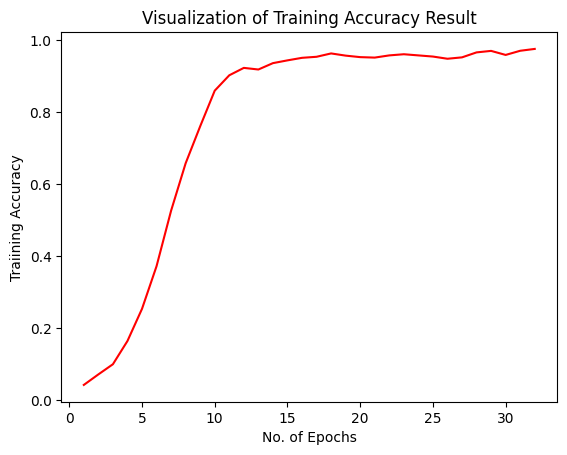

In [110]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

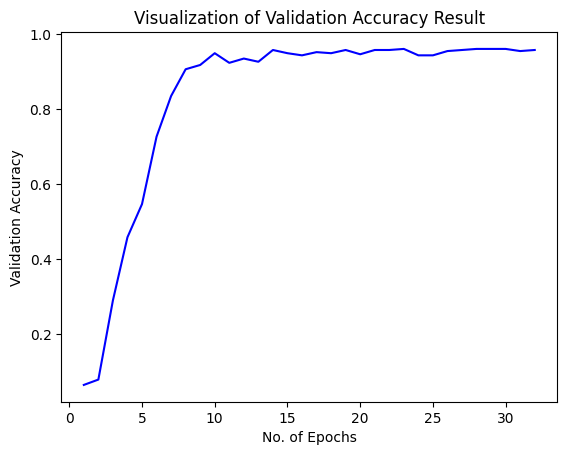

In [111]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

# Evaluating CNN Model

In [112]:
train_loss,train_acc = cnn.evaluate(training_set)

98/98 [==============================] - 86s 828ms/step - loss: 0.0337 - accuracy: 0.9897


In [113]:
validation_loss,validation_acc = cnn.evaluate(validation_set)

11/11 [==============================] - 13s 359ms/step - loss: 0.3082 - accuracy: 0.9573


#Test set evaluation

In [114]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_and_vegetables_recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 359 files belonging to 36 classes.


In [115]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 14s 376ms/step - loss: 0.3021 - accuracy: 0.9582
Test accuracy: 0.9582172632217407
